In [3]:
import numpy as np # used for scientific computing
import pandas as pd # used for data analysis and manipulation
import matplotlib.pyplot as plt # used for visualization and plotting
import matplotlib.cm as cm
import scipy as sp
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


np.random.seed(42) 

3. Import of the .csv file

In [4]:
df = pd.read_csv('air_traffic.csv')
df

,is_more_than_100_passengers?,is_after_2010?,is_summer?,is_winter?,is_spring?,is_authmn?,alaska_airlines?,delta_air_lines?,skywest_airlines?,united_airlines?,virgin_america?,other_airline?,is_from_america?,is_international_airline?,is_lowcost?,is_departing?
0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1
2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
3,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1
15003,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0
15004,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,1
15005,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


5. Num cases:

In [5]:
print("num rows: "+str(df.shape[0]))

num rows: 15007


6. Num features:

In [6]:
print("num cols: "+str(df.shape[1]))

num cols: 16


7. The data points are represented as binary values. For each instance, the feature x is either 0 - not the feature, or 1 - the feature.

In [7]:
X, y = make_blobs(
    n_samples=500,
    n_features=16,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility
print(X.shape, y.shape)
type(X),type(y)


(500, 16) (500,)


(numpy.ndarray, numpy.ndarray)

In [8]:
X_train, X_test = train_test_split(
    X, 
    test_size=0.2, 
    shuffle=False
)
X_train.shape, X_test.shape

((400, 16), (100, 16))

In [9]:
y_pred = km(n_clusters=4, random_state=100).fit_predict(X_train)
# y_pred

C:\Users\haesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# X,y = df.iloc[:,:-1], df.iloc[:,-1]
X=df
print(X.shape)
print(type(X))
X=X.to_numpy()
type(X)


(15007, 16)
<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [11]:
# X = np.linspace(0, 10, 30)
# y = np.sin(X)
# plt.plot(y_pred, 'o')
# plt.plot(X, 'o')


In [49]:
def get_clusterer(points, k):
    clusterer = km(n_clusters=k, n_init=10)
    preds = clusterer.fit_predict(points)
    return clusterer, preds


distance_metric = 'euclidean'
K = 2
clusterer, preds = get_clusterer(df, K)


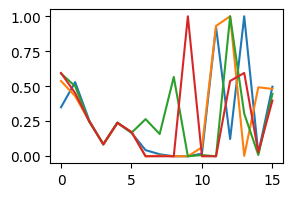

In [56]:
# Define a function that will show the model's results numerically and visually
def show_results (clusterer):
    # print('labels:', clusterer.labels_, '\n')
    centers = clusterer.cluster_centers_
    # print('centroids:')
    # for i in range(K):
    #     print(i, ":", centers[i,:],'\n')
    plt.figure(figsize=(3,2))
    for i in range(len(clusterer.cluster_centers_)):
        plt.plot(centers[i,:])
    plt.show()
# Call the function
show_results(clusterer)

In [38]:
# Define a function that will show the model's silhouette
def print_silhouette(df, preds):
    sil = silhouette_score(df, preds, metric = distance_metric)
    print('silhouette:', sil, '\n')
    
# Call the function
print_silhouette (df, preds)

silhouette: 0.18647688779045277 



for  2  clusters:
silhouette: 0.17990106018375795 



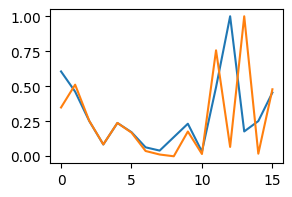

for  3  clusters:
silhouette: 0.18647688779045277 



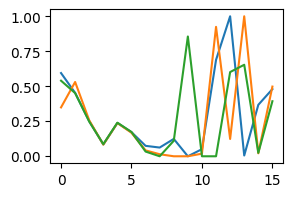

for  4  clusters:
silhouette: 0.1994008207931855 



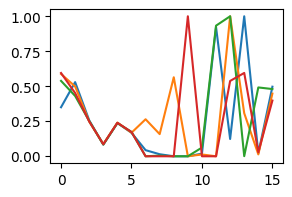

for  5  clusters:
silhouette: 0.14557576109847953 



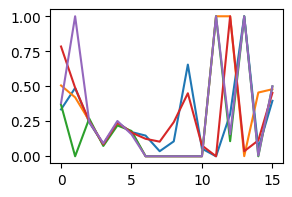

for  6  clusters:


In [61]:
for k in range(2, 11):
    clusterer, preds = get_clusterer(df, k)
    print("for ", k, " clusters:")
    print_silhouette (df, preds)
    show_results(clusterer)

In [1]:
# for n_clusters in range(2, 3):
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # # The 1st subplot is the silhouette plot
#     # # The silhouette coefficient can range from -1, 1 but in this example all
#     # # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # # The (n_clusters+1)*10 is for inserting blank space between silhouette
#     # # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = km(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = clusterer.fit_predict(X)
#     print(clusterer)
#     print(cluster_labels)

#     # The silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     print(
#         "For n_clusters =",
#         n_clusters,
#         "The average silhouette_score is :",
#         silhouette_avg,
#     )

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(X, cluster_labels)
#     print(sample_silhouette_values)
#     print(len(sample_silhouette_values))
#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
#         print(ith_cluster_silhouette_values)
#         ith_cluster_silhouette_values.sort()
#         print(ith_cluster_silhouette_values)
#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         print(size_cluster_i)
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(
#             np.arange(y_lower, y_upper),
#             0,
#             ith_cluster_silhouette_values,
#             facecolor=color,
#             edgecolor=color,
#             alpha=0.7,
#         )

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("The silhouette plot for the various clusters.")
#     ax1.set_xlabel("The silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # The vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(
#         centers[:, 0],
#         centers[:, 1],
#         marker="o",
#         c="white",
#         alpha=1,
#         s=200,
#         edgecolor="k",
#     )

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(
#         "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
#         % n_clusters,
#         fontsize=14,
#         fontweight="bold",
#     )

# plt.show()

NameError: name 'plt' is not defined